<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/Copy_of_Neural_Network_Kaggle_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from sklearn import set_config
set_config(display='diagram')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import make_pipeline

from sklearn.compose import make_column_selector, make_column_transformer

#Sci-kit Learn
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/test.csv'
df = pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
# copy
df_copy = df.copy()

In [ ]:
# check duplicates
df_copy.duplicated().sum()

0

In [ ]:
# check missing values
df_copy.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# Drop unique identifier
df_copy = df_copy.drop(columns={'Id'})

In [ ]:
# Drop columns with 80%+ missing data

df_copy = df_copy.drop(columns={'Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','Utilities' })

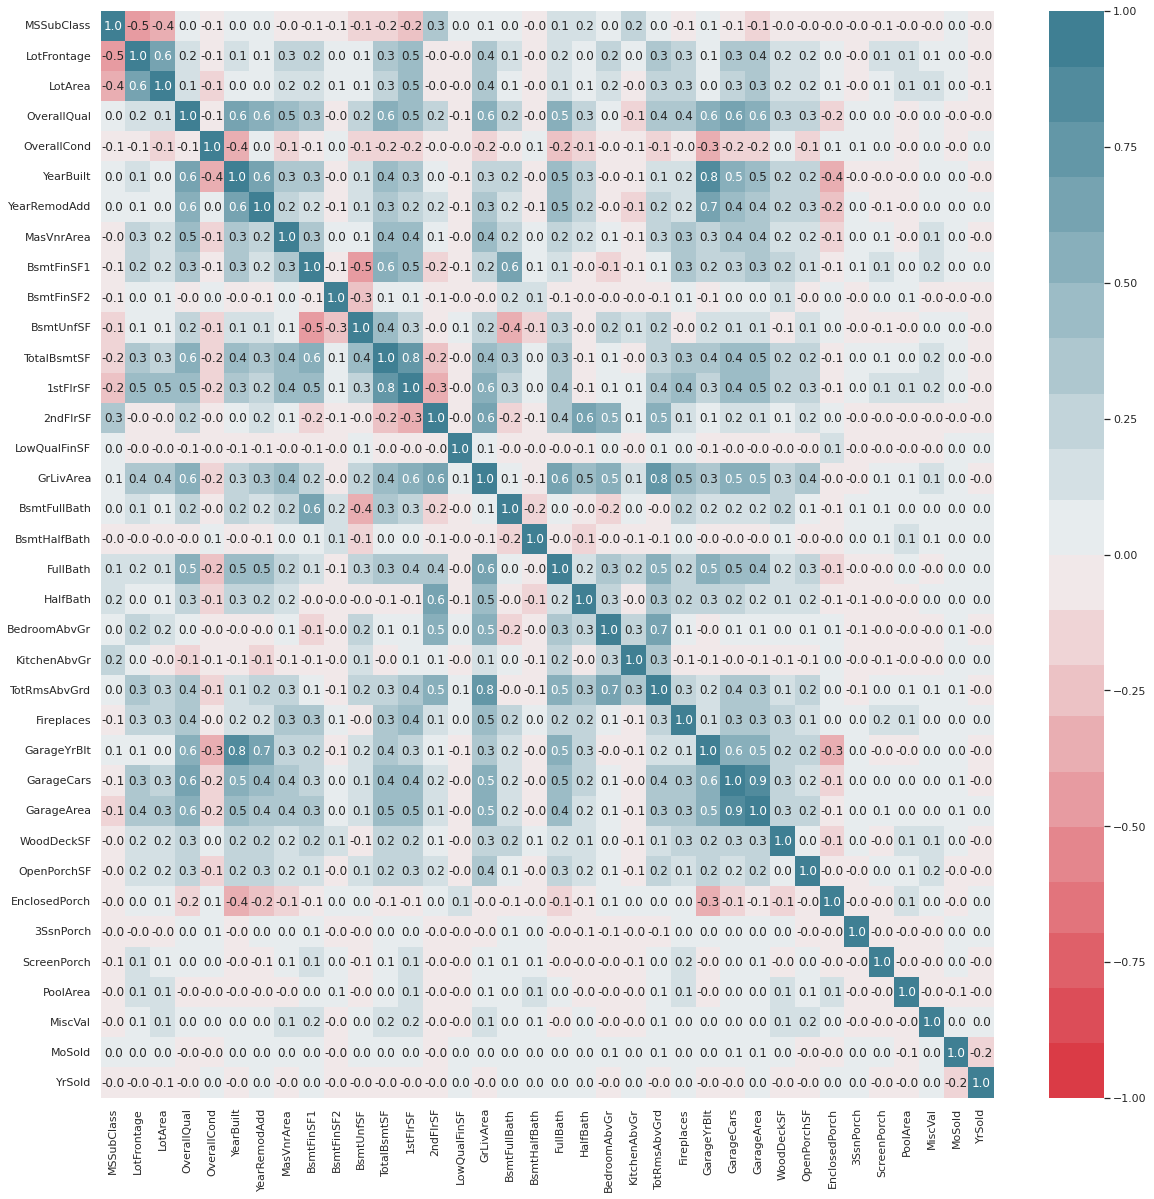

In [ ]:
corr = df_copy.corr()
plt.figure(figsize = (20,20));
sns.heatmap(corr, cmap=sns.diverging_palette(10, 220, n=20), annot = True, vmin=-1, vmax=1, center=0,fmt='.1f');

In [ ]:
# Drop columns with low correlation to sale price

#df_copy = df_copy.drop(columns={'BsmtFinSF2','LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', })
#df_copy = df_copy.drop(columns={'MoSold','YrSold'})


In [ ]:
# Loop through index values of the dataframe
# Will need to fill with this formula AFTER test, train split

def fill_LotFrontage(data_frame, fill_data):

  for ind in data_frame.index:

    x = data_frame.loc[ind, 'LotFrontage']

    if np.isnan(x) == True:

      # Impute LotFrontage based on average of sqauare root of Lot Area and 1stFlrSF estimators

      ratio_area_est = data_frame['LotFrontage'] / (data_frame['LotArea']) ** (1/2)
      area_est = ratio_area_est.mean() * data_frame.loc[ind, 'LotArea'] ** (1/2)
#      print(area_est)

      ratio_first_est = data_frame['LotFrontage'] / (data_frame['1stFlrSF']) ** (1/2)
      first_est = ratio_first_est.mean() * data_frame.loc[ind, '1stFlrSF'] ** (1/2)
#      print(first_est)

      frontage_est = round((area_est + first_est) / 2,0)
      frontage_est = int(frontage_est)
#      print(frontage_est)

      data_frame.loc[ind, 'LotFrontage'] = int(frontage_est)

      data_frame.loc[ind, 'LotFrontage'] = int(data_frame.loc[ind, 'LotFrontage'])

#      print(data_frame.loc[ind, 'LotFrontage'])
#      print("\n")

In [ ]:
fill_LotFrontage(df_copy,df_copy)


In [ ]:
df_copy['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [ ]:
df_copy['MasVnrType'].fillna('None', inplace=True)

In [ ]:
df_copy['MasVnrType'].value_counts()

None       894
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [ ]:
df_copy['MasVnrArea'].value_counts()

0.0       877
176.0      10
144.0       9
120.0       8
216.0       8
200.0       7
302.0       6
504.0       6
198.0       6
128.0       6
60.0        5
210.0       5
203.0       5
260.0       5
140.0       5
196.0       5
164.0       5
256.0       5
180.0       4
174.0       4
20.0        4
16.0        4
186.0       4
44.0        4
194.0       4
240.0       4
112.0       4
232.0       4
178.0       4
50.0        4
340.0       4
40.0        4
88.0        4
150.0       4
306.0       4
143.0       4
242.0       4
23.0        4
420.0       4
450.0       3
68.0        3
190.0       3
108.0       3
270.0       3
130.0       3
145.0       3
513.0       3
52.0        3
182.0       3
206.0       3
456.0       3
76.0        3
132.0       3
280.0       3
252.0       3
264.0       3
126.0       3
90.0        3
96.0        3
162.0       3
170.0       3
32.0        3
80.0        3
248.0       3
172.0       3
98.0        3
72.0        3
14.0        3
300.0       3
218.0       2
568.0       2
156.0 

In [ ]:
df_copy['MasVnrArea'].fillna(0, inplace=True)

In [ ]:
df_copy['MasVnrArea'] = df_copy['MasVnrArea'].astype('int64')
df_copy['MasVnrArea'].value_counts()

0       892
176      10
144       9
120       8
216       8
200       7
302       6
504       6
198       6
128       6
60        5
210       5
203       5
260       5
140       5
196       5
164       5
256       5
180       4
174       4
20        4
16        4
186       4
44        4
194       4
240       4
112       4
232       4
178       4
50        4
340       4
40        4
88        4
150       4
306       4
143       4
242       4
23        4
420       4
450       3
68        3
190       3
108       3
270       3
130       3
145       3
513       3
52        3
182       3
206       3
456       3
76        3
132       3
280       3
252       3
264       3
126       3
90        3
96        3
162       3
170       3
32        3
80        3
248       3
172       3
98        3
72        3
14        3
300       3
218       2
568       2
156       2
51        2
492       2
136       2
212       2
123       2
161       2
480       2
352       2
1224      2
86        2
310       2
290 

In [ ]:
df_copy['BsmtQual'].value_counts()


TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [ ]:
df_copy.isna().sum()

MSSubClass        0
MSZoning          4
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0


In [ ]:
df_copy['Exterior1st'] = df_copy['Exterior1st'].fillna(df_copy['Exterior1st'].value_counts().index[0])
df_copy['Exterior2nd'] = df_copy['Exterior2nd'].fillna(df_copy['Exterior2nd'].value_counts().index[0])
df_copy['KitchenQual'] = df_copy['KitchenQual'].fillna(df_copy['KitchenQual'].value_counts().index[0])
df_copy['Functional'] = df_copy['Functional'].fillna(df_copy['Functional'].value_counts().index[0])
df_copy['GarageCars'] = df_copy['GarageCars'].fillna(df_copy['GarageCars'].value_counts().index[0])
df_copy['GarageArea'] = df_copy['GarageArea'].fillna(df_copy['GarageArea'].value_counts().index[0])
df_copy['SaleType'] = df_copy['SaleType'].fillna(df_copy['SaleType'].value_counts().index[0])

In [ ]:
df_copy['BsmtQual'].fillna('None', inplace=True)
df_copy['BsmtCond'].fillna('None', inplace=True)
df_copy['BsmtExposure'].fillna('None', inplace=True)
df_copy['BsmtFinType1'].fillna('None', inplace=True)
df_copy['BsmtFinType2'].fillna('None', inplace=True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Condition2     1459 non-null   object 
 12  BldgType       1459 non-null   object 
 13  HouseStyle     1459 non-null   object 
 14  OverallQual    1459 non-null   int64  
 15  OverallCond    1459 non-null   int64  
 16  YearBuilt      1459 non-null   int64  
 17  YearRemodAdd   1459 non-null   int64  
 18  RoofStyl

In [ ]:

df_copy['MSZoning'].value_counts()


RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [ ]:
df_copy['MSZoning'] = df_copy['MSZoning'].fillna(df_copy['MSZoning'].value_counts().index[0])

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Condition2     1459 non-null   object 
 12  BldgType       1459 non-null   object 
 13  HouseStyle     1459 non-null   object 
 14  OverallQual    1459 non-null   int64  
 15  OverallCond    1459 non-null   int64  
 16  YearBuilt      1459 non-null   int64  
 17  YearRemodAdd   1459 non-null   int64  
 18  RoofStyl

In [ ]:
df_copy['Electrical'] = df_copy['Electrical'].fillna(df_copy['Electrical'].value_counts().index[0])

In [ ]:
df_copy['Electrical'].value_counts()

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [ ]:
df_copy['GarageType'].fillna('No Garage', inplace=True)
df_copy['GarageFinish'].fillna('No Garage', inplace=True)
df_copy['GarageQual'].fillna('No Garage', inplace=True)
df_copy['GarageCond'].fillna('No Garage', inplace=True)

In [ ]:
df_copy = df_copy.drop(columns={'GarageYrBlt'})

In [ ]:
#df_copy.dropna(inplace=True)
#df_copy = df_copy.drop(columns={'Longitude', 'Latitude'})

In [ ]:
# checking any inconsistent values
df_copy.describe(include= 'all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459,1459.000000,1459.000000,1459,1459,1459,1459,1459,1459,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459
unique,NaN,5,NaN,NaN,2,4,4,5,3,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6
top,NaN,RL,NaN,NaN,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal
freq,NaN,1118,NaN,NaN,1453,934,1311,1081,1396,218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1259,1204
mean,57.378341,NaN,69.224812,9819.161069,NaN,NaN,NaN,NaN,NaN,NaN,...,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705,NaN,NaN
std,42.746880,NaN,21.152563,4955.517327,NaN,NaN,NaN,NaN,NaN,NaN,...,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740,NaN,NaN
min,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN
25%,20.000000,NaN,60.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,NaN,NaN
50%,50.000000,NaN,69.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN
75%,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN


In [ ]:
# This for loop will check any inconsistent values in all columns

for col in df_copy:
    pd.set_option('display.max_rows', None)
    print(f'{col}:\n')
    print(df_copy[col].value_counts())
    print("\n\n")

Streaming output truncated to the last 5000 lines.
720.0       2
253.0       2
339.0       2
848.0       2
504.0       2
369.0       2
801.0       2
677.0       2
245.0       2
248.0       2
1008.0      2
945.0       2
483.0       2
494.0       2
644.0       2
781.0       2
550.0       2
825.0       2
363.0       2
1643.0      2
332.0       2
592.0       2
548.0       2
268.0       2
171.0       2
83.0        2
782.0       2
180.0       2
163.0       2
884.0       2
397.0       2
367.0       2
319.0       2
76.0        2
520.0       2
821.0       2
403.0       2
1560.0      2
443.0       2
1143.0      2
88.0        2
716.0       2
1528.0      2
207.0       2
686.0       2
52.0        2
752.0       2
918.0       2
423.0       2
263.0       2
736.0       2
941.0       2
598.0       2
639.0       2
238.0       2
437.0       2
1018.0      2
426.0       2
440.0       2
399.0       2
684.0       2
575.0       2
430.0       2
538.0       2
596.0       2
215.0       2
436.0       2
952.0      

In [ ]:
# This for loop will check any inconsistent values in all columns

for col in df_copy:
    print(f'{col}:\n')
    print(df_copy[col].value_counts().head(20))
    print("\n\n")

MSSubClass:

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
75       7
180      7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64



MSZoning:

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64



LotFrontage:

60.0    139
80.0     74
70.0     72
75.0     64
65.0     63
50.0     61
63.0     38
85.0     38
74.0     34
72.0     34
64.0     31
24.0     30
68.0     30
21.0     27
78.0     27
62.0     26
90.0     25
67.0     25
73.0     24
76.0     21
Name: LotFrontage, dtype: int64



LotArea:

9600     20
7200     18
6000     17
9000     15
7500     12
10800    11
6240     10
7000      9
6120      9
1680      8
10320     7
9750      7
8000      7
8400      7
10400     6
8640      6
2280      6
8750      5
5400      5
9350      5
Name: LotArea, dtype: int64



Street:

Pave    1453
Grvl       6
Name: Street, dtype: int64



LotShape:

Reg    9

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Condition2     1459 non-null   object 
 12  BldgType       1459 non-null   object 
 13  HouseStyle     1459 non-null   object 
 14  OverallQual    1459 non-null   int64  
 15  OverallCond    1459 non-null   int64  
 16  YearBuilt      1459 non-null   int64  
 17  YearRemodAdd   1459 non-null   int64  
 18  RoofStyl


 MSSubClass 



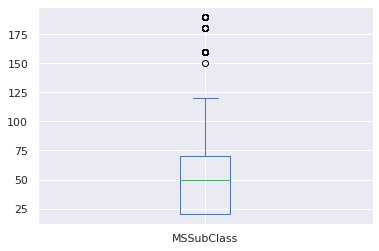


 LotArea 



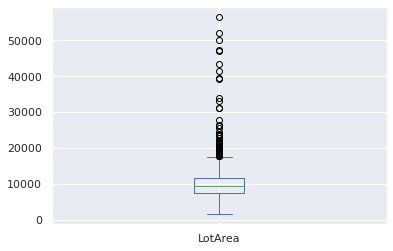


 OverallQual 



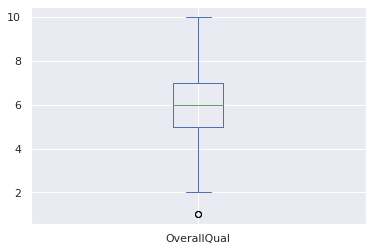


 OverallCond 



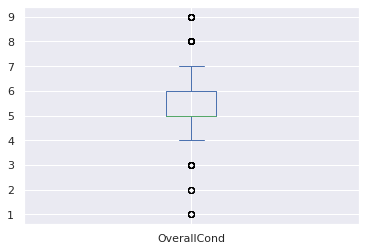


 YearBuilt 



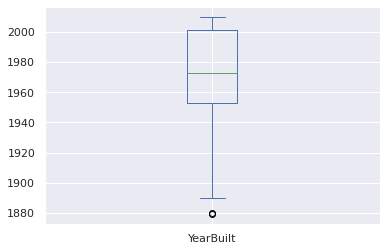


 YearRemodAdd 



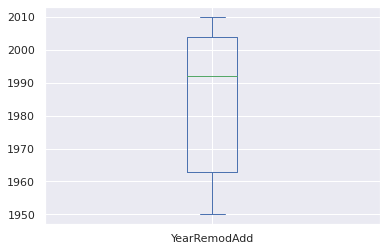


 MasVnrArea 



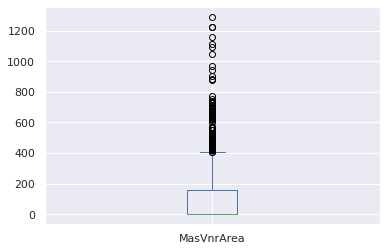


 1stFlrSF 



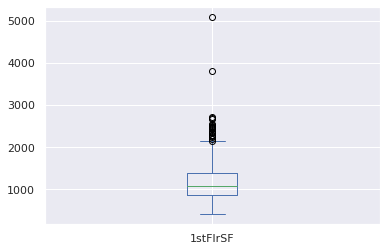


 2ndFlrSF 



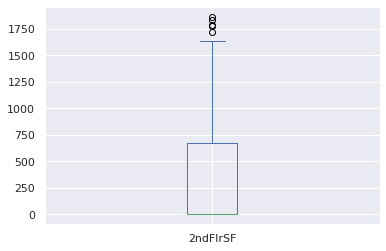


 LowQualFinSF 



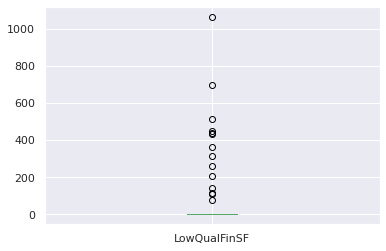


 GrLivArea 



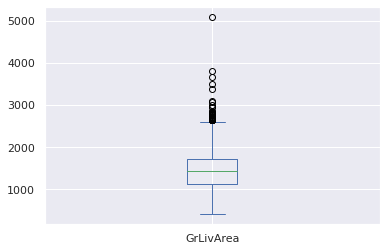


 FullBath 



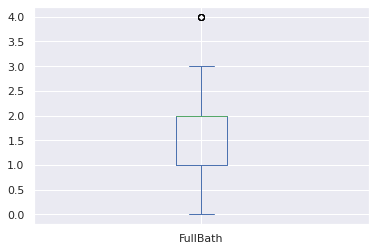


 HalfBath 



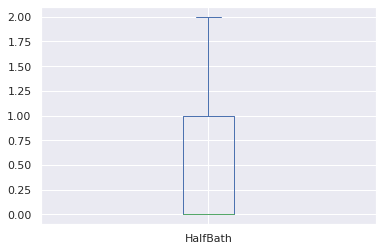


 BedroomAbvGr 



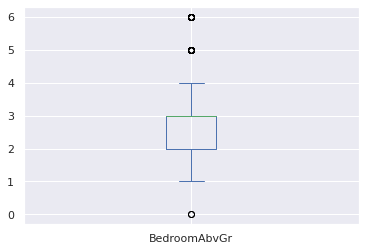


 KitchenAbvGr 



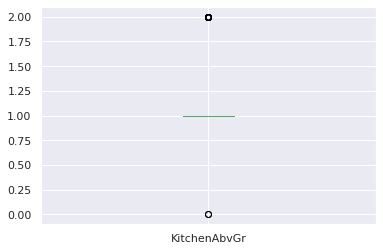


 TotRmsAbvGrd 



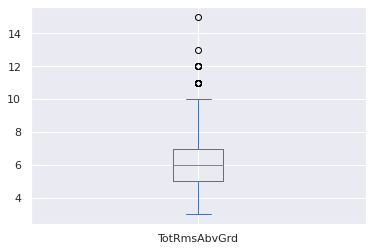


 Fireplaces 



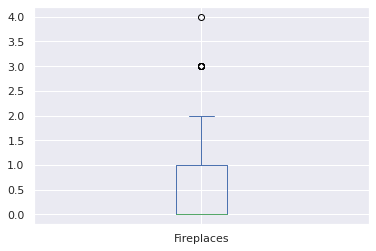


 WoodDeckSF 



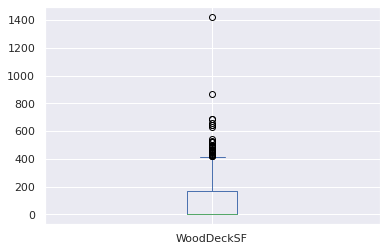


 OpenPorchSF 



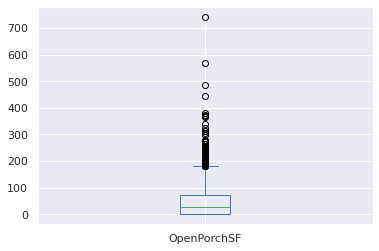


 EnclosedPorch 



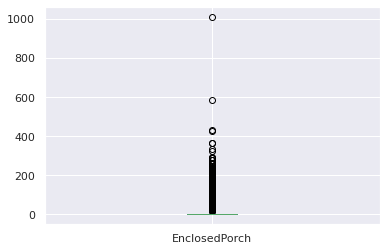


 3SsnPorch 



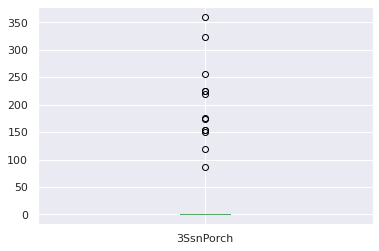


 ScreenPorch 



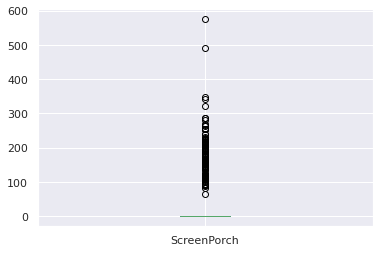


 PoolArea 



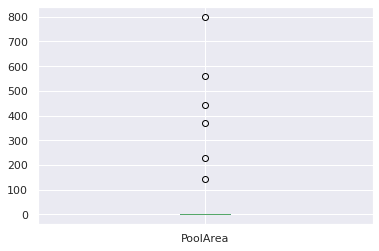


 MiscVal 



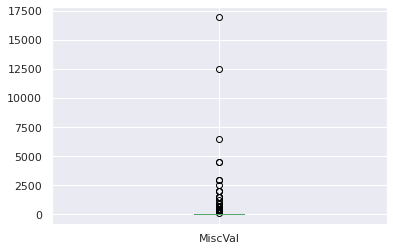


 MoSold 



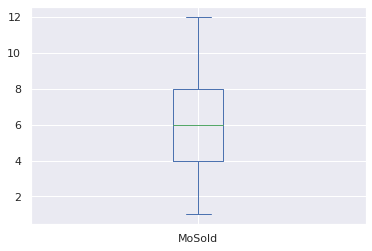


 YrSold 



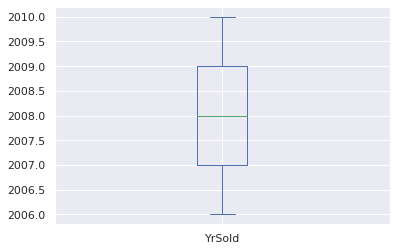

CPU times: user 3.36 s, sys: 93.6 ms, total: 3.45 s
Wall time: 3.6 s


In [ ]:
# # explore numeric distributions via boxplots to see outliers
%%time
for col in df_copy.select_dtypes('int64'):
  print('\n', col, '\n')
  df_copy[col].plot(kind='box')
  plt.show()

In [ ]:
print("Number of rows in the data:", df_copy.shape[0])
print("Number of columns in the data:", df_copy.shape[1])

Number of rows in the data: 1459
Number of columns in the data: 72


In [ ]:
# Eliminate outliers

#df_copy = df_copy.loc[df_copy['LotArea'] <= 25000,:]
#df_copy = df_copy.loc[df_copy['SalePrice'] <= 500000,:]
#df_copy = df_copy.loc[df_copy['BsmtFinSF1'] <= 2000,:]
#df_copy = df_copy.loc[df_copy['MasVnrArea'] <= 1200,:]
#df_copy = df_copy.loc[df_copy['TotalBsmtSF'] <= 3000,:]
#df_copy = df_copy.loc[df_copy['1stFlrSF'] <= 2500,:]
#df_copy = df_copy.loc[df_copy['GrLivArea'] <= 4000,:]
#df_copy = df_copy.loc[df_copy['LotFrontage'] <= 160,:]



print("Number of rows in the data:", df_copy.shape[0])
print("Number of columns in the data:", df_copy.shape[1])


Number of rows in the data: 1459
Number of columns in the data: 72



 MSSubClass 



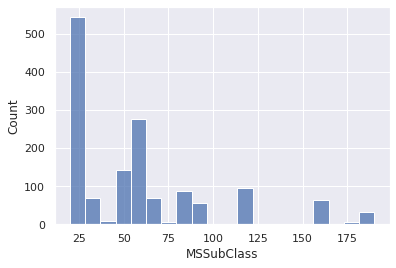


 LotArea 



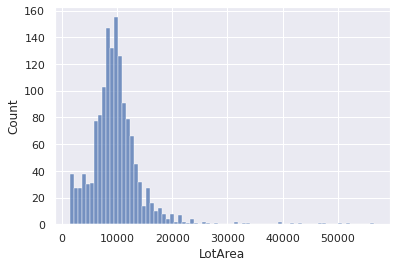


 OverallQual 



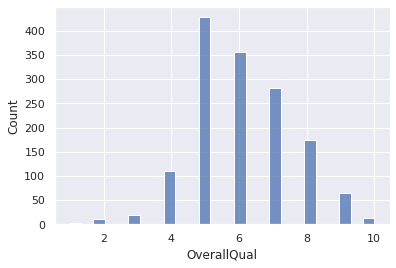


 OverallCond 



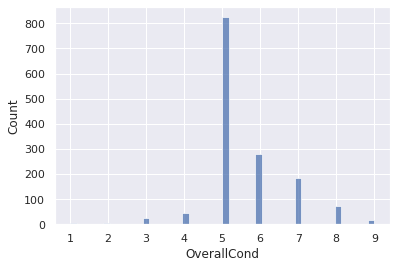


 YearBuilt 



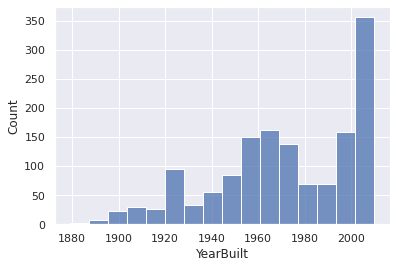


 YearRemodAdd 



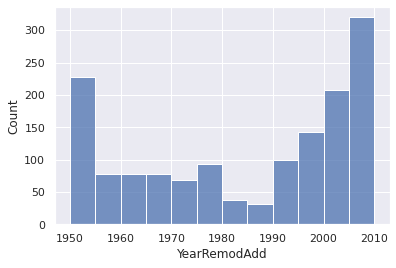


 MasVnrArea 



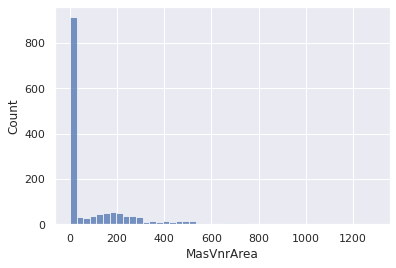


 1stFlrSF 



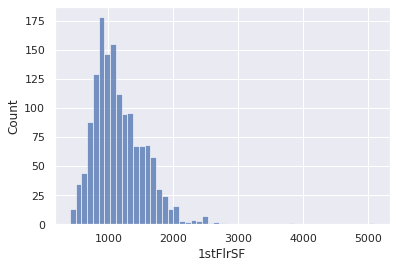


 2ndFlrSF 



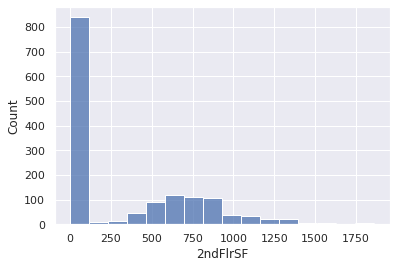


 LowQualFinSF 



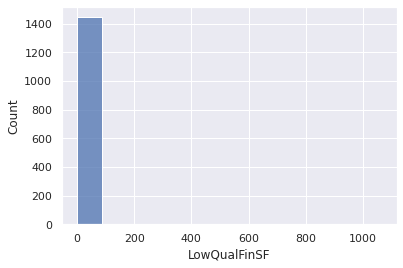


 GrLivArea 



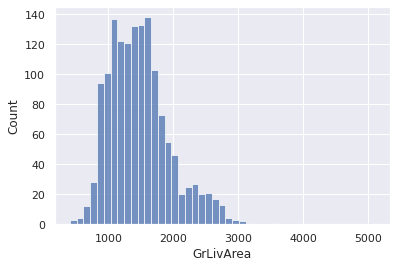


 FullBath 



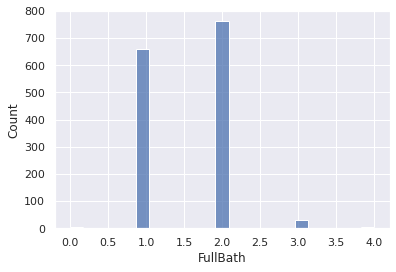


 HalfBath 



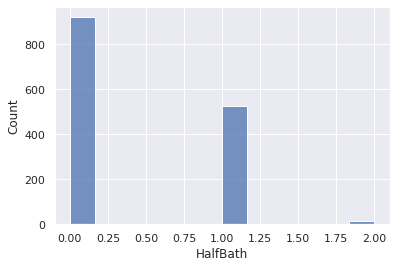


 BedroomAbvGr 



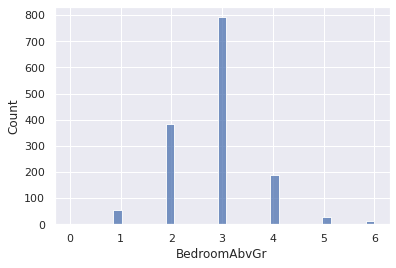


 KitchenAbvGr 



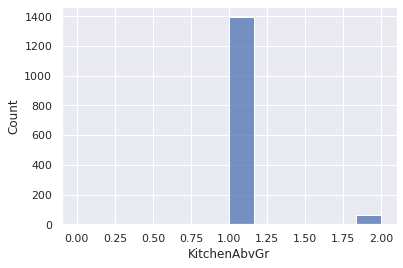


 TotRmsAbvGrd 



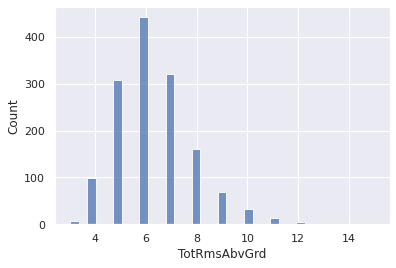


 Fireplaces 



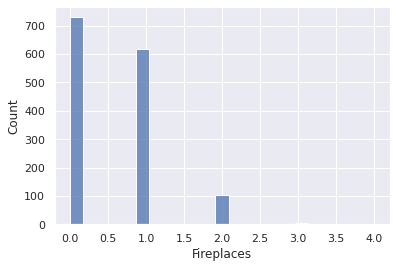


 WoodDeckSF 



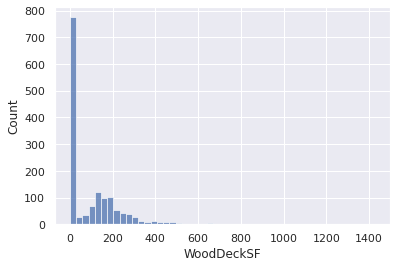


 OpenPorchSF 



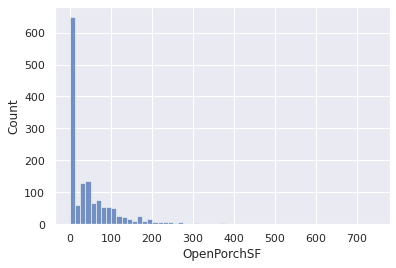


 EnclosedPorch 



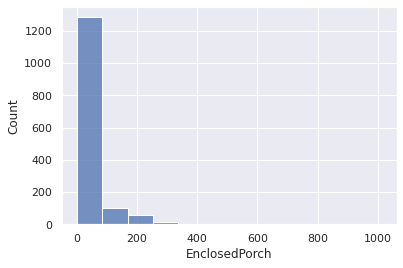


 3SsnPorch 



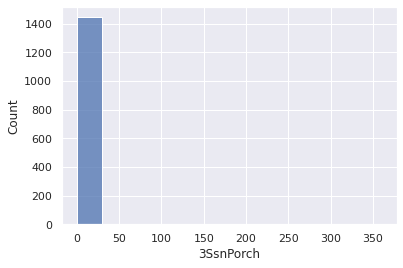


 ScreenPorch 



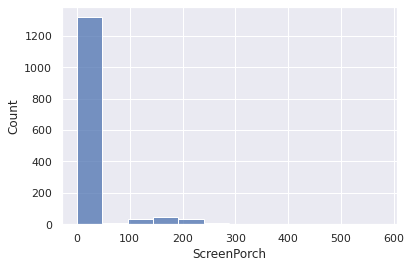


 PoolArea 



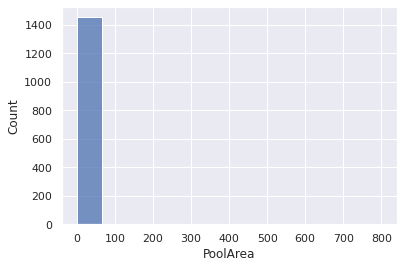


 MiscVal 



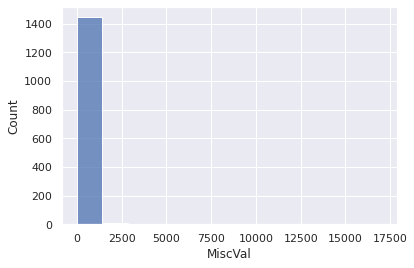


 MoSold 



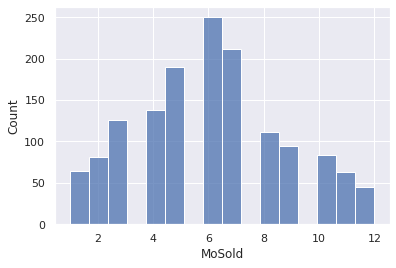


 YrSold 



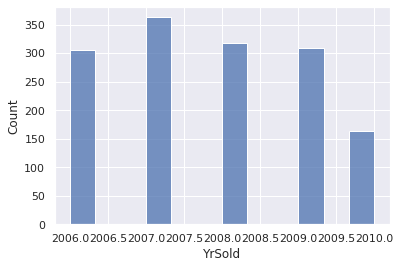

CPU times: user 8.24 s, sys: 124 ms, total: 8.36 s
Wall time: 8.44 s


In [ ]:
%%time
for col in df_copy.select_dtypes('int64'):
  print('\n', col, '\n')
  sns.set(style="darkgrid")
  sns.histplot(data=df_copy, x=col, palette="ch:.10");
  plt.show()

There are a lot out outliers here!  I will run everything with the outliers then decide if I need to do something about them.  It looks like they are not accidential so I may try to use some data engineering.

There are also a lot of rows that have a lot of zeros. In fact, I think that many of these should be binary not features like they are listed. That is, if there is a porch that should be yes/no.  Square footage doesn't seem to add much value.

In [ ]:
df_copy['BathroomTotCount'] = df_copy['BsmtFullBath'] + df_copy['FullBath'] + df_copy['HalfBath'] + df_copy['BsmtHalfBath']

df_copy['BathroomBedroomRatio'] = df_copy['BathroomTotCount'] / df_copy['BedroomAbvGr']
df_copy['BathroomBedroomRatio'].value_counts()

1.000000    476
0.666667    338
0.500000    169
0.333333    103
1.500000     99
1.333333     98
0.750000     59
2.000000     45
3.000000     22
0.400000     11
0.250000      9
0.600000      8
1.666667      6
0.800000      5
1.250000      3
2.500000      3
inf           2
4.000000      1
Name: BathroomBedroomRatio, dtype: int64

In [ ]:
print("Number of rows in the data:", df_copy.shape[0])
print("Number of columns in the data:", df_copy.shape[1])

Number of rows in the data: 1459
Number of columns in the data: 74


In [ ]:
# Replace infinite updated data with nan
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN

df_copy = df_copy.dropna(subset=['BathroomBedroomRatio'])


#df_copy.dropna(inplace=True)

In [ ]:
print("Number of rows in the data:", df_copy.shape[0])
print("Number of columns in the data:", df_copy.shape[1])

Number of rows in the data: 1455
Number of columns in the data: 74


In [ ]:
df_copy['BathroomBedroomRatio'].value_counts()

1.000000    476
0.666667    338
0.500000    169
0.333333    103
1.500000     99
1.333333     98
0.750000     59
2.000000     45
3.000000     22
0.400000     11
0.250000      9
0.600000      8
1.666667      6
0.800000      5
1.250000      3
2.500000      3
4.000000      1
Name: BathroomBedroomRatio, dtype: int64

In [ ]:
df_copy.isna().sum()

MSSubClass              0
MSZoning                0
LotFrontage             0
LotArea                 0
Street                  0
LotShape                0
LandContour             0
LotConfig               0
LandSlope               0
Neighborhood            0
Condition1              0
Condition2              0
BldgType                0
HouseStyle              0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
RoofStyle               0
RoofMatl                0
Exterior1st             0
Exterior2nd             0
MasVnrType              0
MasVnrArea              0
ExterQual               0
ExterCond               0
Foundation              0
BsmtQual                0
BsmtCond                0
BsmtExposure            0
BsmtFinType1            0
BsmtFinSF1              0
BsmtFinType2            0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
Heating                 0
HeatingQC               0
CentralAir  

In [ ]:
df_copy.to_csv('kaggle2_df.csv', index = False)

## Visualization

In [ ]:
%%time
for col in df_copy.select_dtypes('number'):
  print('\n', col, '\n')
  sns.regplot(data=df_copy,
                x=col,
                y='SalePrice',
                x_ci='ci',
                ci=99,
                marker='.',
                scatter_kws={"color": "black"},
                line_kws={"color": "red"},
                ax=None);
  plt.show()


In [ ]:
df_copy['MSSubClass'] = df_copy['MSSubClass'].astype('object')


# Machine Learning

In [ ]:
df_ml = df_copy.copy()

## Defining X and y

In [ ]:
# make selector columns:
# numerical columns
num_selector = make_column_selector(dtype_include = 'number')

# categorical columns
cat_selector = make_column_selector(dtype_include = 'object')



In [ ]:
# instantiate an ohe for categorical columns
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
# instantiate scaler for numeric columns
scaler = MinMaxScaler()

In [ ]:
# make pipeline with Preprocessing and PCA
pca = PCA(n_components = .9999)
preprocessor = make_column_transformer((scaler, num_selector ), (ohe, cat_selector ), remainder='passthrough')
pca_processing = make_pipeline(preprocessor, pca)
pca_processing

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f80d7b652e0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f80d7b65610>)])),
                ('pca', PCA(n_components=0.9999))])

In [ ]:
# fit in X_train
pca_processing.fit(df_ml)
# transform both X_train and X_test
df_ml_processed = pca_processing.transform(df_ml)


In [ ]:
# check
df_ml_processed.dtype

dtype('float64')

In [ ]:
np.isnan(df_ml_processed).sum()

0

In [ ]:
type(df_ml_processed)

numpy.ndarray

In [ ]:
from numpy import savetxt
# save to csv file
savetxt('df_ml_processed.csv', delimiter=',')


TypeError: ignored